In [1]:
# importing of required libaraies
import PyPDF2
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import nltk
import re
import numpy as np
from PyPDF2 import PdfFileWriter, PdfFileReader
from nltk import sent_tokenize,word_tokenize
from nltk.tokenize  import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.probability import FreqDist
from string import punctuation
from nltk.corpus import stopwords
from nltk.text import Text
from string import punctuation
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('5_threat_groups.csv')

In [12]:
lemmatizer = WordNetLemmatizer() 
text_apt1=df['APT1'][0]
text_apt12=df['APT12'][0]

In [13]:
text_apt1 = sent_tokenize(text_apt1)

In [14]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(text_apt1)

In [15]:
X_train = tokenizer.texts_to_sequences(text_apt1)

In [167]:
stop_words=stopwords.words("english")+list(punctuation)
def tokenization(text):
    pre_processed_text=[]
    words = [w for sent in nltk.sent_tokenize(str(text)) for w in nltk.word_tokenize(sent)]    
    tokens=[w for w in words if w.lower() not in stop_words] 
    tokens=[w.lower() for w in tokens if ((w.isalnum()) & (len(w)>1))]
    tokens=[lemmatizer.lemmatize(w, pos ="v") for w in tokens]
    return tokens

In [174]:
def cloud_image(text):
    tokens=tokenization(text)
    print(len(tokens))
    text=' '+' '.join(tokens)+' '
    stopwords = stop_words
    wordcloud = WordCloud(width = 1080, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=100,
                min_font_size = 8).generate(text) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

19505


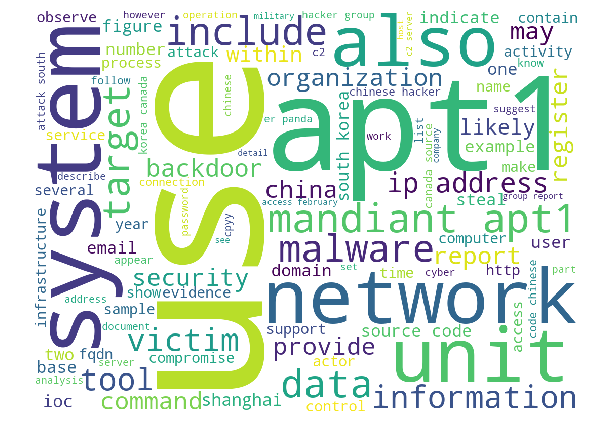

3503


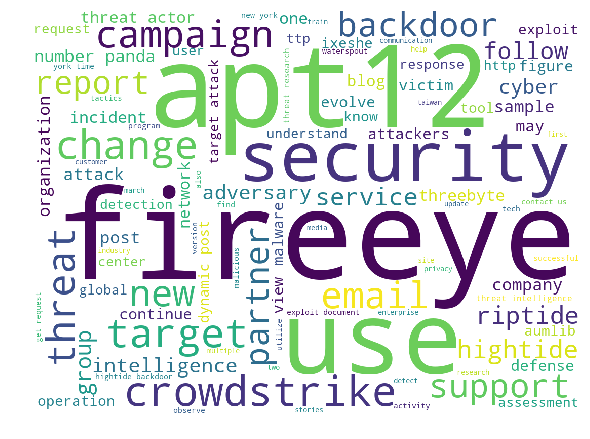

4352


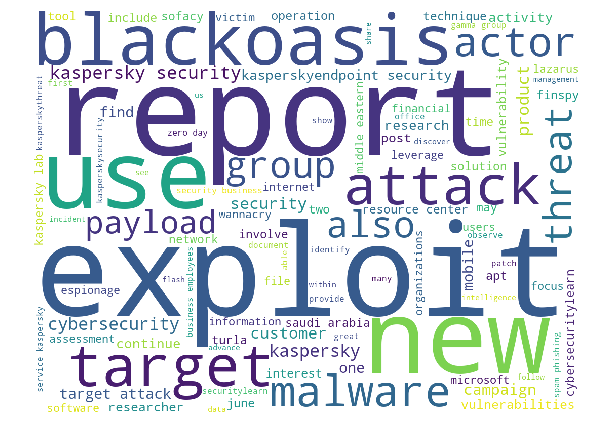

14665


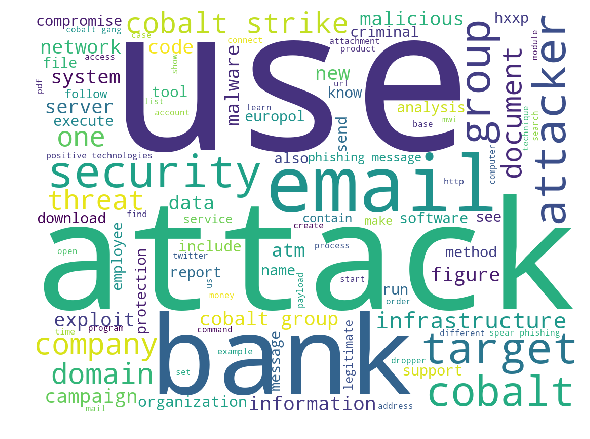

59791


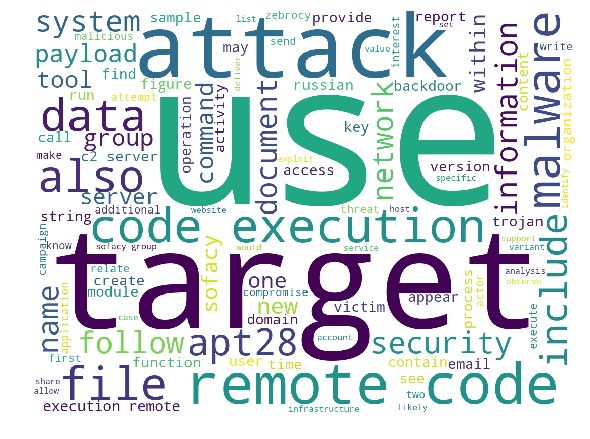

In [175]:
columns=df.columns
for column in columns:
    text=df[column][0]
    cloud_image(text)
    

In [156]:
tokens=tokenization(text)
text=' '+' '.join(tokens)+' '
stopwords = stop_words

In [157]:
tdm=dict()
for token in tokens:
    if token not in tdm:
        tdm[token] = 1
    else:
        tdm[token] = tdm.get(token)+1

In [158]:
df=pd.DataFrame(tdm.items(),columns=['keyword','occurences'])
df.sort_values(['occurences'],ascending=False,inplace=True)

In [159]:
stop=['used','Figure','also','']

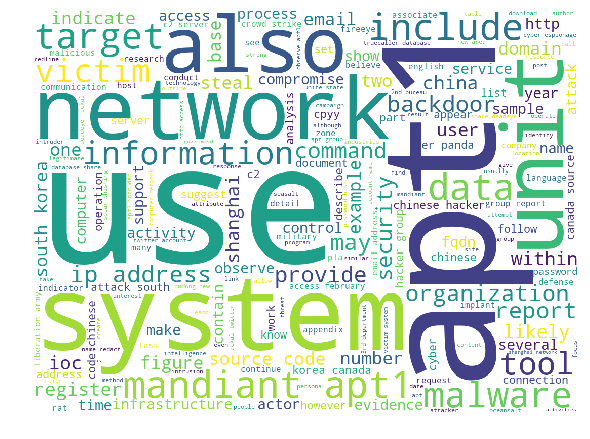

In [161]:
wordcloud = WordCloud(width = 1080, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=200,
                min_font_size = 8).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [5]:
def extract_hashes(text):
    regex_list = {

    'wordpress_md5': '\$P\$[\w\d./]+',
    'phpBB3_md5': '\$H\$[\w\d./]+',
    'sha1':  '(?<!\w)[a-fA-F\d]{40}(?!\w)',
    'md5':  '(?<!\w)[a-fA-F\d]{32}(?!\w)',
    'sha256':  '(?<!\w)[a-fA-F\d]{64}(?!\w)',
    'sha512':  '(?<!\w)[a-fA-F\d]{128}(?!\w)',
    'mysql':  '(?<!\w)[a-fA-F\d]{16}(?!\w)',
    'mysql5': '\*[A-F\d]{40}'

    }

    result = {}

    for format in regex_list.keys():
        hashes = []
        regex = re.compile(regex_list[format])
        hashes = regex.findall(text,re.I)
        if hashes:
            result[format] = hashes

    return result

In [6]:
extract_hashes(text_apt1)

{'sha1': ['281a13ecb674de42f2e8fdaea5e6f46a5436c685',
  '1f70715e86a2fcc1437926ecfaeadc53ddce41c9',
  'ec9a9d431fd69e23a5b770bf03fe0fb5a21c0c36',
  '12a9faa96ba1be8a73e73be72ef1072096d964fb',
  'be4fbb5a4b32db20a914cad5701f5c7ba51571b7',
  '0ae167204c841bdfd3600dddf2c9c185b17ac6d4'],
 'md5': ['10010100101110001100100011010100',
  'c1393e77773a48b1eea117a302138554',
  '38216571e9a9364b509e52ec19fae61b',
  '531dee019792a089a4589c2cce3dac95',
  '0355C116C02B02C05D6E90A0B3DC107C',
  '74A50A5705E2AF736095B6B186D38DDF',
  '45C362F17C5DC8496E97D475562BEC4D',
  'C1773E9CF8265693F37DF1A39E0CBBE2',
  'D14DD769C7F53ACEC482347F539EFDF4',
  'B2F6D9A62C63F61A6B33DC6520BFCCCD',
  '76C8DA4147B08E902809D1E80D96FBB4',
  'C1773E9CF8265693F37DF1A39E0CBBE2',
  '74A50A5705E2AF736095B6B186D38DDF',
  '45C362F17C5DC8496E97D475562BEC4D',
  '76C8DA4147B08E902809D1E80D96FBB4',
  'bd01d910153ffb4d0115a7c12f70042e',
  'bc4e9dad71b844dd3233cfbbb96c1bd3',
  'b54e91c234ec0e739ce429f47a317313',
  '4c50457c35e2033b3a03f